In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('./Placement_Data_Full_Class.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
dataset.drop(['salary','sl_no','specialisation','mba_p'], axis=1, inplace=True)

In [5]:
# missing values checking
dataset.isnull().sum()

gender      0
ssc_p       0
ssc_b       0
hsc_p       0
hsc_b       0
hsc_s       0
degree_p    0
degree_t    0
workex      0
etest_p     0
status      0
dtype: int64

In [6]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  status    215 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.6+ KB


# Label Encoding Data

In [7]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [8]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Placed,0,1,0,1,0,0


In [9]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Placed,0,1,0,1,0,0


In [11]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.

In [12]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])


In [13]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,1,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,1,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,1,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,0,1,0,1,0,0


In [14]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.688372,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.464240,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for Outliers

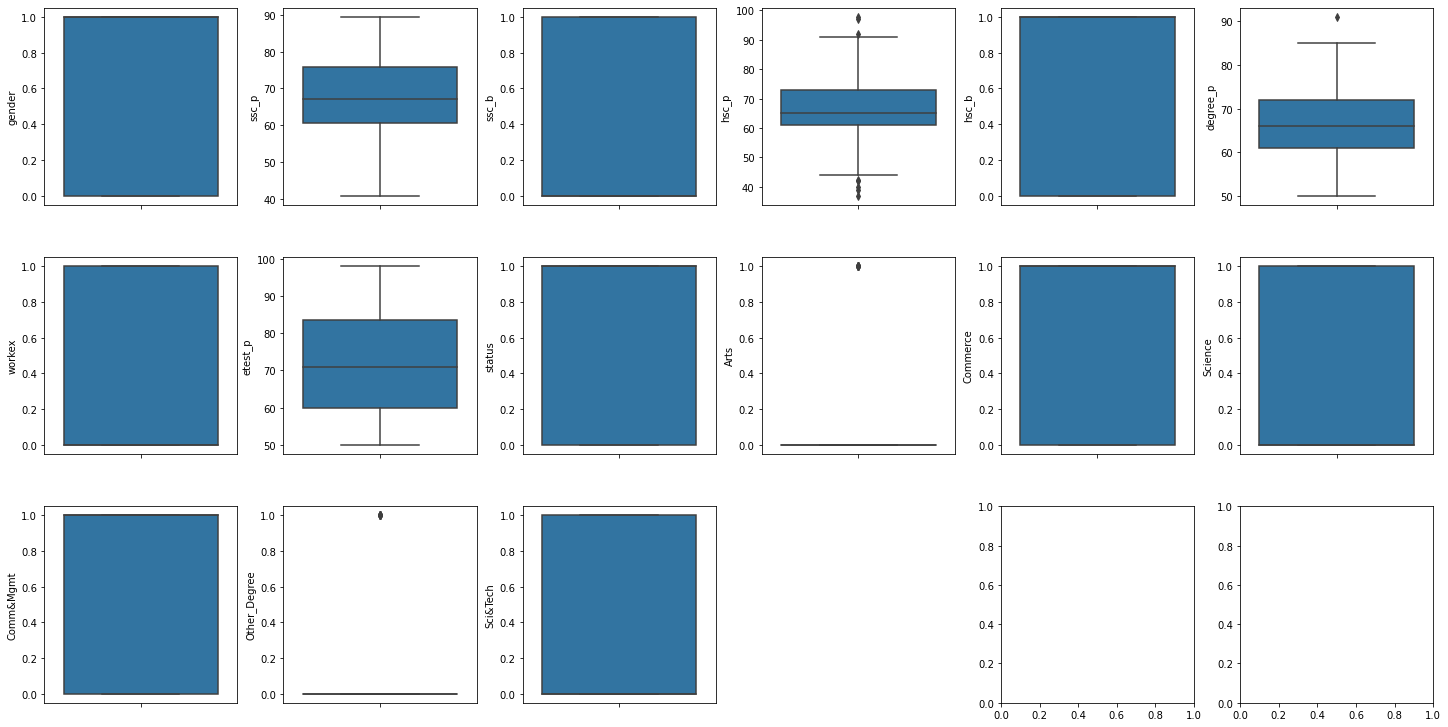

In [15]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [16]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

# Checking for Correlation

In [17]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,0.098189,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,0.605381,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,0.033717,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,0.499777,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.009393,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,0.479557,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,0.279091,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,0.122770,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
status,0.098189,0.605381,0.033717,0.499777,0.009393,0.479557,0.279091,0.122770,1.000000,-0.069693,0.028377,0.002618,0.054545,-0.115435,0.000324
Arts,-0.096386,-0.194514,-0.001410,-0.074931,-0.114855,-0.153777,0.054259,-0.073539,-0.069693,1.000000,-0.247575,-0.198994,-0.021492,0.328810,-0.141863


<AxesSubplot:>

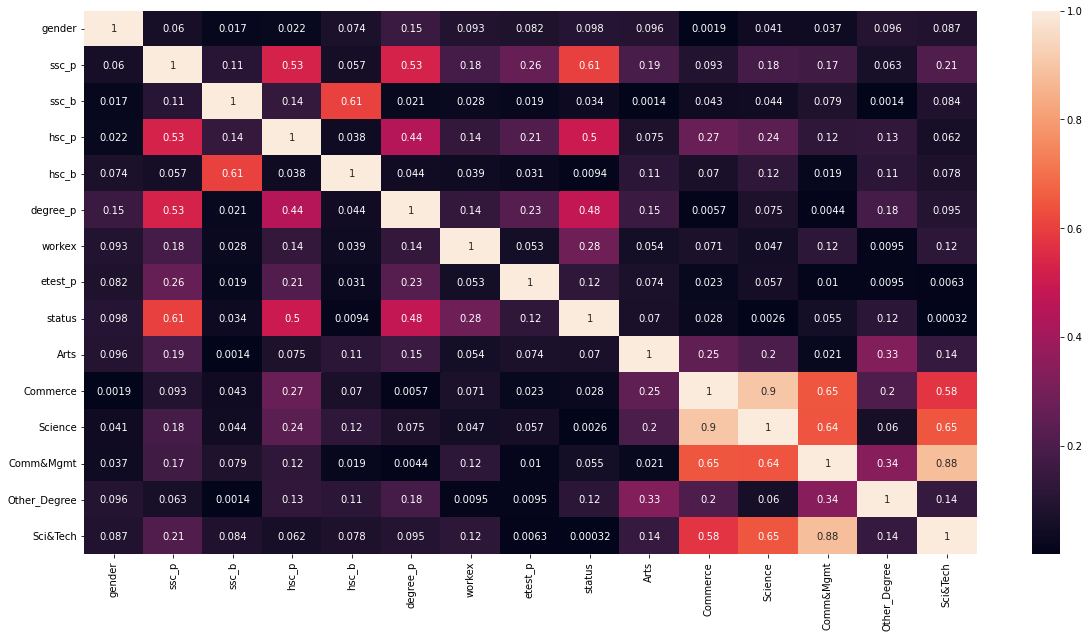

In [18]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

Correlation between the features are atmost 0.9 so they are not multi-correlated

In [19]:
dataset.shape

(212, 15)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

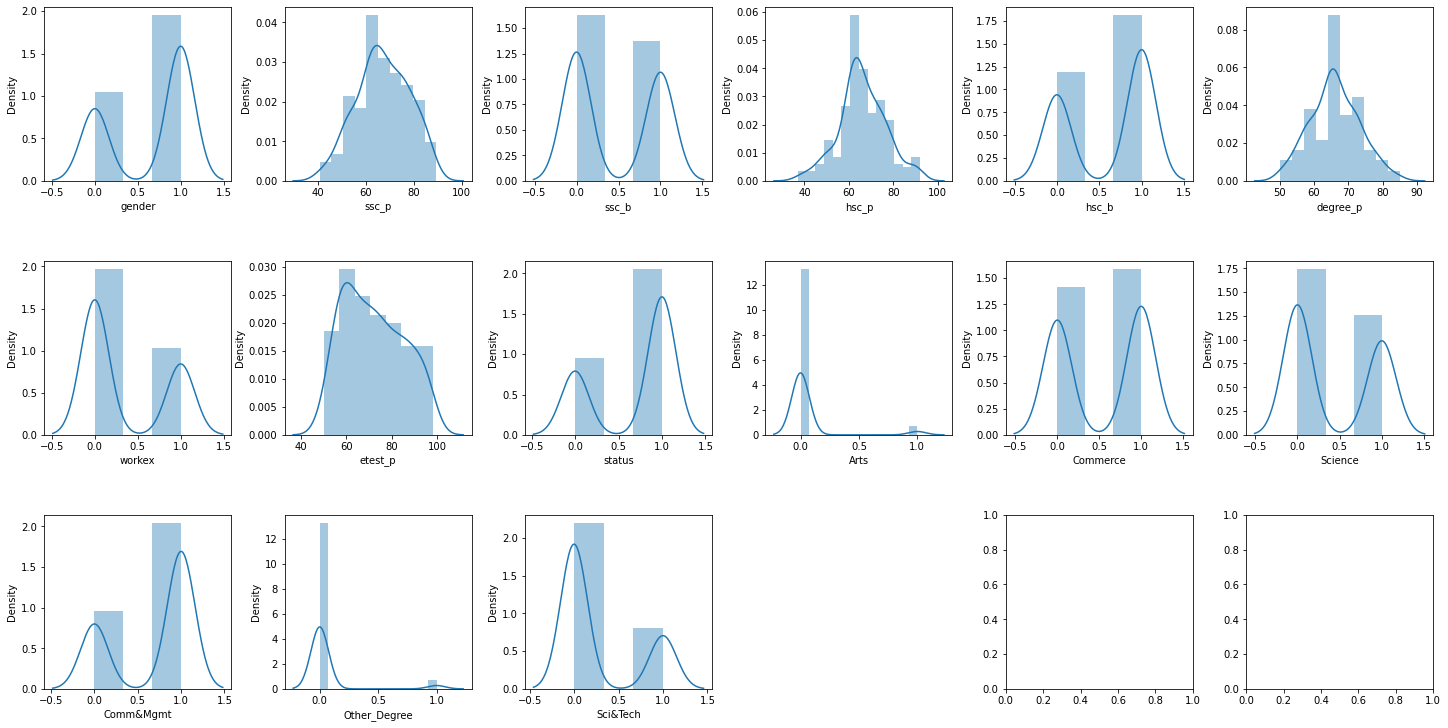

In [20]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [21]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
y = dataset.loc[:, 'status'] # label is status of placement

In [22]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,0,1,0,1,0,0


In [23]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 212, dtype: int32

In [24]:
#sc= StandardScaler()
#x_scaled = sc.fit_transform(x) # for standardising the features
#x_scaled = pd.DataFrame(x_scaled)

In [25]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.18, random_state=0)

# Using Logistic Regression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(x_train, y_train)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [30]:
print(type(x_test))
#print(x_test.iloc[11])
print(x_test.iloc[12])
print(y_pred[12])


print(x_test.iloc[15])
print(y_pred[15])

<class 'pandas.core.frame.DataFrame'>
gender           1.0
ssc_p           52.0
ssc_b            0.0
hsc_p           49.0
hsc_b            1.0
degree_p        58.0
workex           0.0
etest_p         62.0
Arts             0.0
Commerce         1.0
Science          0.0
Comm&Mgmt        1.0
Other_Degree     0.0
Sci&Tech         0.0
Name: 159, dtype: float64
0
gender           1.00
ssc_p           55.68
ssc_b            1.00
hsc_p           61.33
hsc_b            1.00
degree_p        56.87
workex           0.00
etest_p         66.00
Arts             0.00
Commerce         1.00
Science          0.00
Comm&Mgmt        1.00
Other_Degree     0.00
Sci&Tech         0.00
Name: 203, dtype: float64
0


In [31]:
y_test

209    1
38     1
90     1
192    1
150    1
76     1
97     0
138    1
5      0
84     1
56     1
144    0
159    0
113    1
75     0
203    1
127    1
12     0
169    0
157    1
167    0
201    0
211    1
189    0
184    0
18     0
214    0
15     1
87     0
72     1
7      1
64     1
142    1
98     1
137    1
161    0
34     0
153    1
91     0
Name: status, dtype: int32

In [32]:
accuracy_score(y_test, y_pred)

0.7948717948717948

In [33]:
lr.score(x_train,y_train)

0.8670520231213873

In [34]:
confusion_matrix(y_test, y_pred)

array([[12,  5],
       [ 3, 19]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.79      0.86      0.83        22

    accuracy                           0.79        39
   macro avg       0.80      0.78      0.79        39
weighted avg       0.80      0.79      0.79        39



In [36]:
import pickle
pickle.dump(lr,open("lr_model.pkl",'wb'))

# Using Naive Bayes Classifier - Gaussian Naive Bayes

In [37]:
nbclassifier = GaussianNB()

In [38]:
nbclassifier.fit(x_train, y_train)

GaussianNB()

In [39]:
y_pred_nb = nbclassifier.predict(x_test)

In [40]:
accuracy_score(y_test, y_pred_nb)

0.7948717948717948

In [41]:
nbclassifier.score(x_train, y_train)

0.8439306358381503

In [42]:
confusion_matrix(y_test, y_pred_nb)

array([[12,  5],
       [ 3, 19]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.79      0.86      0.83        22

    accuracy                           0.79        39
   macro avg       0.80      0.78      0.79        39
weighted avg       0.80      0.79      0.79        39



# Using SVM Linear Kernel

In [44]:
clf = svm.SVC(kernel="linear")

In [45]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred_svm = clf.predict(x_test)

In [47]:
accuracy_score(y_test, y_pred_svm)

0.8717948717948718

In [48]:
clf.score(x_train, y_train)

0.8959537572254336

In [49]:
confusion_matrix(y_test, y_pred_svm)

array([[15,  2],
       [ 3, 19]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.90      0.86      0.88        22

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



In [51]:
import pickle
pickle.dump(clf,open("sv_model.pkl",'wb'))

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  
knn .fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
[[10  7]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.74      0.91      0.82        22

    accuracy                           0.77        39
   macro avg       0.79      0.75      0.75        39
weighted avg       0.78      0.77      0.76        39



In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
[[13  4]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.81      0.77      0.79        22

    accuracy                           0.77        39
   macro avg       0.77      0.77      0.77        39
weighted avg       0.77      0.77      0.77        39



In [55]:
rclf = RandomForestClassifier(n_estimators=100,n_jobs=-1)  
rclf.fit(x_train, y_train)
y_pred = rclf.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8205128205128205
[[12  5]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.80      0.91      0.85        22

    accuracy                           0.82        39
   macro avg       0.83      0.81      0.81        39
weighted avg       0.82      0.82      0.82        39



In [56]:
import pickle
pickle.dump(rclf,open("rclf_model.pkl",'wb'))